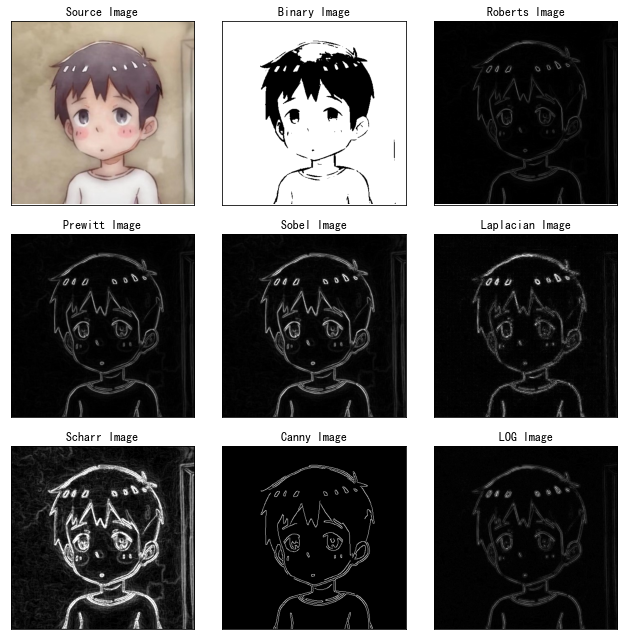

In [7]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取图像
img = cv2.imread(os.path.join("E:/CV/code/data", 'icon.png'))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#阈值处理 二值化
ret, binary = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)     
absY = cv2.convertScaleAbs(y)    
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#Prewitt算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)  
absY = cv2.convertScaleAbs(y)    
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)

#Sobel算子
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0)
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1)    
absX = cv2.convertScaleAbs(x)   
absY = cv2.convertScaleAbs(y)    
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#拉普拉斯算法
dst = cv2.Laplacian(grayImage, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)

# Scharr算子
x = cv2.Scharr(grayImage, cv2.CV_32F, 1, 0) #X方向
y = cv2.Scharr(grayImage, cv2.CV_32F, 0, 1) #Y方向
absX = cv2.convertScaleAbs(x)       
absY = cv2.convertScaleAbs(y)
Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#Canny算子
gaussianBlur = cv2.GaussianBlur(grayImage, (5,5), 0) #高斯滤波
Canny = cv2.Canny(gaussianBlur , 50, 150) 

#LOG算子
gaussianBlur = cv2.GaussianBlur(grayImage, (5,5), 0) #高斯滤波
dst = cv2.Laplacian(gaussianBlur, cv2.CV_16S, ksize = 3)
LOG = cv2.convertScaleAbs(dst)

#效果图
titles = ['Source Image', 'Binary Image', 'Roberts Image',
          'Prewitt Image','Sobel Image', 'Laplacian Image',
          'Scharr Image', 'Canny Image', 'LOG Image']  
images = [rgb_img, binary, Roberts, Prewitt,
          Sobel, Laplacian, Scharr, Canny, LOG]  

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9, 9),sharex='all', sharey='all')
ax = ax.flatten()
for i in range(9):
    ax[i].set_title(f"{titles[i]}")
    ax[i].imshow(images[i],'gray')
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()

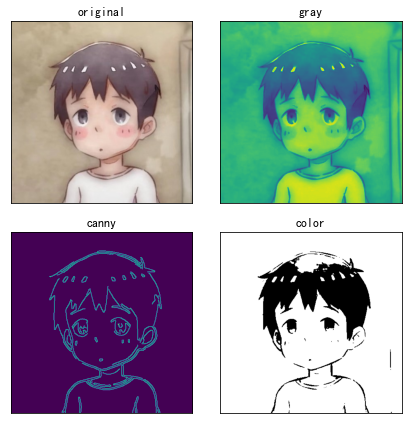

In [29]:
import cv2  
import os
import numpy as np  
from PIL import Image
import matplotlib.pyplot as plt

def colorful(arr):
    palette = []
    for i in range(256):
        palette.extend((i, i, i))
        
    # palette[:3*21] = CONFIG['voc12']['palette'].flatten()
    assert len(palette) == 768

    im = Image.fromarray(arr)
    im.putpalette(palette)
    return im


#读取图像
img = cv2.imread(os.path.join("E:/CV/code/data", 'icon.png'))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#Canny算子
#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaussianBlur = cv2.GaussianBlur(grayImage, (5,5), 0) #高斯滤波
canny_img = cv2.Canny(gaussianBlur , 50, 150) 

#阈值处理 二值化
ret, binary = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

# 上色
color_img = colorful(binary)

#效果图
titles = ['original','gray', 'canny', 'color']  
images = [rgb_img, grayImage, canny_img, color_img]  

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6),sharex='all', sharey='all')
ax = ax.flatten()
for i in range(4):
    ax[i].set_title(f"{titles[i]}")
    ax[i].imshow(images[i])
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()


## K-Means聚类

(443, 443, 3)


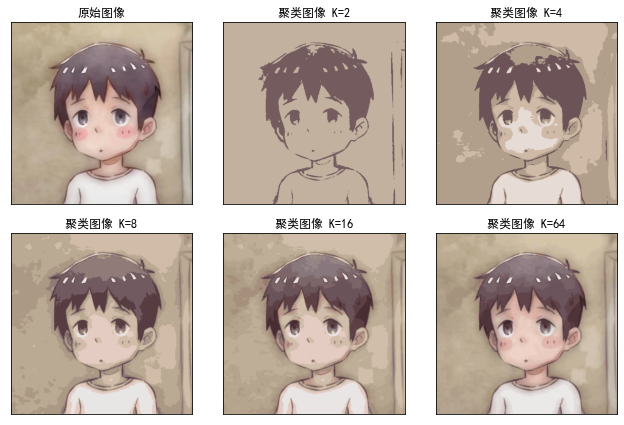

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread(os.path.join("E:/CV/code/data", 'icon.png'))
print(img.shape)

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)

#K-Means聚类 聚集成4类
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)

#K-Means聚类 聚集成8类
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)

#K-Means聚类 聚集成16类
compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 10, flags)

#K-Means聚类 聚集成64类
compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 10, flags)

#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((img.shape))

centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((img.shape))

centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((img.shape))

centers16 = np.uint8(centers16)
res = centers16[labels16.flatten()]
dst16 = res.reshape((img.shape))

centers64 = np.uint8(centers64)
res = centers64[labels64.flatten()]
dst64 = res.reshape((img.shape))

#图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB)
dst16 = cv2.cvtColor(dst16, cv2.COLOR_BGR2RGB)
dst64 = cv2.cvtColor(dst64, cv2.COLOR_BGR2RGB)


#显示图像
titles = [u'原始图像', u'聚类图像 K=2', u'聚类图像 K=4',
          u'聚类图像 K=8', u'聚类图像 K=16',  u'聚类图像 K=64']  
images = [img, dst2, dst4, dst8, dst16, dst64]  


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 6),sharex='all', sharey='all')
ax = ax.flatten()
for i in range(6):
    ax[i].set_title(f"{titles[i]}")
    ax[i].imshow(images[i],'gray')
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()

443x443像素的灰度图像，有443x443个RGB灰度级组成，通过K-Means将这些像素点聚类成K个簇，使用每个簇内的质心点来替换簇内所有像素点，实现不改变分辨率的情况下量化压缩图像颜色，实现图像颜色层级分割

## 均值漂移聚类

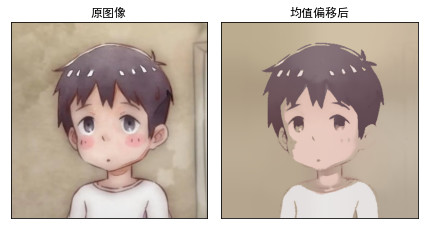

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像灰度颜色
img = cv2.imread(os.path.join("E:/CV/code/data", 'icon.png'))

spatialRad = 50   #空间窗口大小
colorRad = 50     #色彩窗口大小
maxPyrLevel = 2    #金字塔层数

#图像均值漂移分割
dst = cv2.pyrMeanShiftFiltering( img, spatialRad, colorRad, maxPyrLevel)

# 转化成RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

#显示图像
titles = ['原图像','均值偏移后']
images = [img,dst]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6),sharex='all', sharey='all')
ax = ax.flatten()
for i in range(2):
    ax[i].set_title(f"{titles[i]}")
    ax[i].imshow(images[i],'gray')
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()


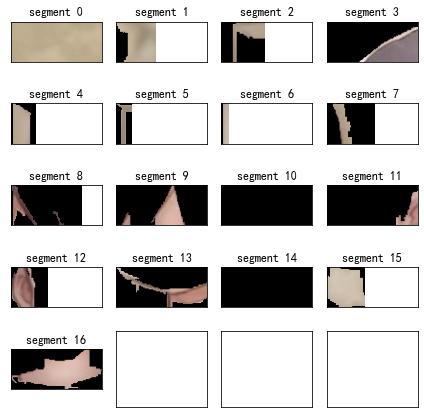

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
segmentator = cv2.ximgproc.segmentation.createGraphSegmentation(sigma=0.5, k=300, min_size=1000)
src = cv2.imread(os.path.join("E:/CV/code/data", 'icon.png'))
segment = segmentator.processImage(src)
mask = segment.reshape(list(segment.shape) + [1]).repeat(3, axis=2)
masked = np.ma.masked_array(src, fill_value=0)

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(6, 6),sharex='all', sharey='all')
ax = ax.flatten()

for i in range(np.max(segment)):
    masked.mask = mask != i
    y, x = np.where(segment == i)
    top, bottom, left, right = min(y), max(y), min(x), max(x)
    dst = masked.filled()[top : bottom + 1, left : right + 1]
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    ax[i].set_title(f"segment {i}")
    ax[i].imshow(dst)

    # cv2.imwrite('segment_{num}.jpg'.format(num=i), dst)
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()


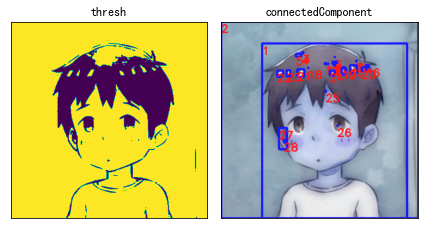

In [18]:
import cv2
import numpy as np

img = cv2.imread(os.path.join("E:/CV/code/data", 'icon.png'))

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
# 搜索图像中的连通区域
ret, labels, stats, centroid = cv2.connectedComponentsWithStats(th)

for i, stat in enumerate(stats):
  #绘制连通区域
    cv2.rectangle(img, (stat[0], stat[1]), (stat[0] + stat[2], stat[1] + stat[3]), (25, 25, 255), 3)
  #按照连通区域的索引来打上标签
    cv2.putText(img, str(i+1), (stat[0], stat[1] + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 25, 25), 2)


# cv2.imshow('thresh', th)
# cv2.imshow('connectedComponent', img)
titles = ['thresh','connectedComponent']
images = [th,img]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6),sharex='all', sharey='all')
ax = ax.flatten()
for i in range(2):
    ax[i].set_title(f"{titles[i]}")
    ax[i].imshow(images[i])
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Python Efficient Graph-Based Image Segmentation

In [5]:
import cv2
import random as rand

import numpy as np

import graph_based_image-segmentation.GraphOperator as go

def generate_image(ufset, width, height):
    random_color = lambda: (int(rand.random() * 255), int(rand.random() * 255), int(rand.random() * 255))
    color = [random_color() for i in range(width * height)]
    save_img = np.zeros((height, width, 3), np.uint8)
    for y in range(height):
        for x in range(width):
            color_idx = ufset.find(y * width + x)
            save_img[y, x] = color[color_idx]
    return save_img

def graph_segment(img,sigma=0.5, k=300, min_size=50):
    float_img = np.asarray(img, dtype=float)
    gaussian_img = cv2.GaussianBlur(float_img, (5, 5), sigma)
    b, g, r = cv2.split(gaussian_img)
    smooth_img = (r, g, b)
    height, width, channel = img.shape
    graph = go.build_graph(smooth_img, width, height)
    weight = lambda edge: edge[2]
    sorted_graph = sorted(graph, key=weight)
    ufset = go.segment_graph(sorted_graph, width * height, k)
    ufset = go.remove_small_component(ufset, sorted_graph, min_size)
    res_img = generate_image(ufset, width, height)
    return res_img

input_path = os.path.join("E:/CV/code/pegbis/data", 'paris.jpg')
img = cv2.imread(input_path)
graph_img = graph_segment(img)

titles = ['原图','图分割后']
images = [img,graph_img]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6),sharex='all', sharey='all')
ax = ax.flatten()
for i in range(2):
    ax[i].set_title(f"{titles[i]}")
    ax[i].imshow(images[i])
ax[0].set_xticks([]),ax[0].set_yticks([])
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-5-4e8040983b9e>, line 6)

In [2]:
! conda list scipy

# packages in environment at D:\myDevs\Anaconda\envs\pytorch_gpu:
#
# Name                    Version                   Build  Channel
